# K-means clustering algorithm
$ \text{- Input: K, set of points } {x}_1, ..., {x}_{n}$

$ \text{- Place centroids } {c}_1, ..., {c}_{k} \text{ at random locations}$

$ \text{- Repeat until convergence: }$

$ \text{    + for each point } {x}_{i}:$

$ \quad 	\bullet \text{ find nearest centroid } {c}_{j} \quad \quad \underset{j}{\arg\min}D({x}_{i}, {c}_{j})$

$ \quad 	\bullet \text{ assign the point } {x}_{i} \text{ to cluster j}$

$ \text{    + for each cluster j = 1 ... K :} \quad \quad {c}_{j}(a) = \frac{1}{{n}_{j}} \Sigma_{{x}_{i} \rightarrow {c}_{j}}^{} {x}_{i}(a) \quad \text{ for a = 1 ... d}$

$ \quad 	\bullet \text{ new centroid } {c}_{j} \text{ = to mean of all points } {x}_{i} \text{assigned to cluster j in previous step}$

$ \text{- Stop when none of the cluster assignments change }$

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.decomposition import PCA
from IPython.display import clear_output


In [2]:
iris = pd.read_csv('IRIS.csv')
x = iris.iloc[:, [0, 1, 2, 3]].values

In [3]:
iris.info()
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=iris["species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [6]:
# split data into 3 separate dataframes
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

/Users/huytuannguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/huytuannguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/huytuannguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

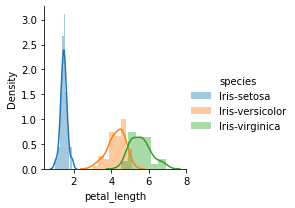

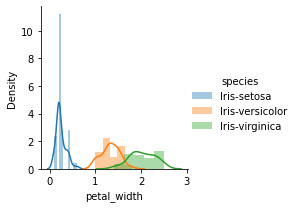

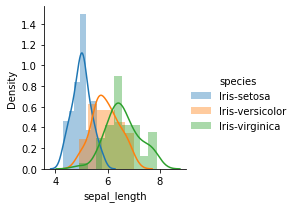

In [7]:
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"sepal_length").add_legend()
plt.show()

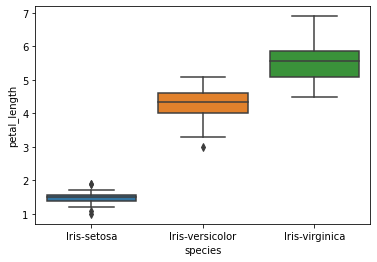

In [8]:
sns.boxplot(x="species",y="petal_length",data=iris)
plt.show()

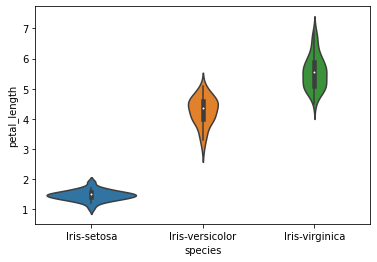

In [9]:
sns.violinplot(x="species",y="petal_length",data=iris)
plt.show()

/Users/huytuannguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


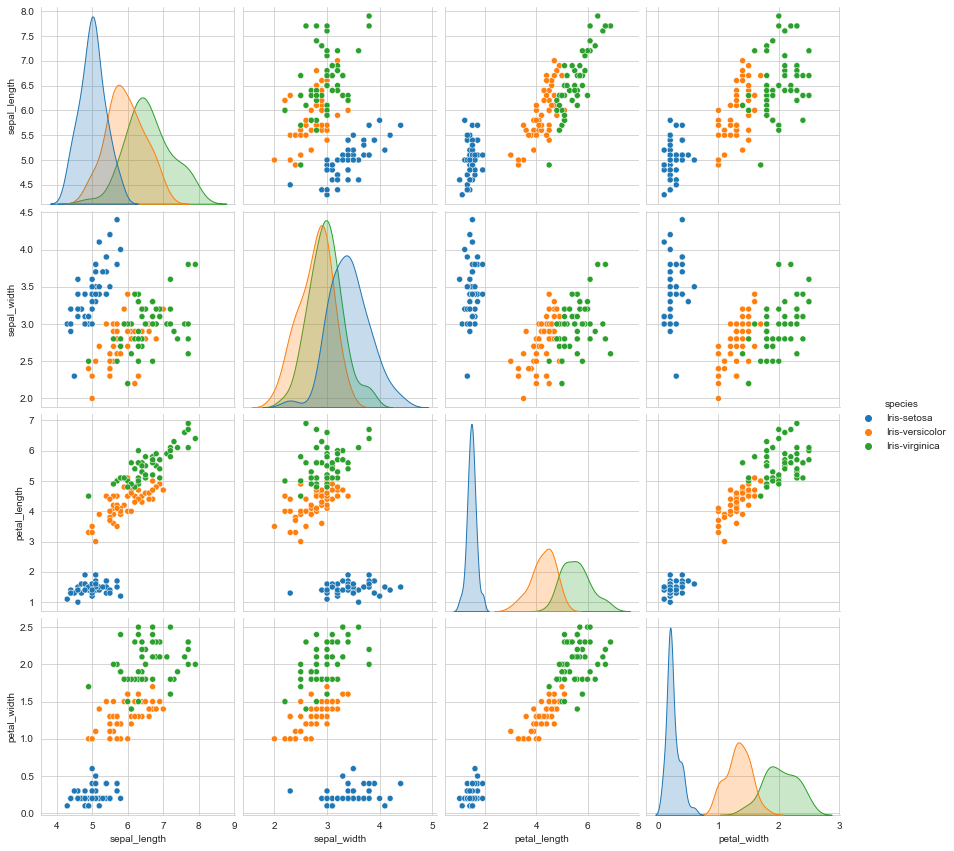

In [10]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",size=3);
plt.show()

In [25]:
def init_centroids(dataFrame, k):
    """create k centroids according to the data set

    Args:
        dataFrame (ndarray (m,n)): data 
        k (int): number of centroids

    Returns:
        centroidsList (ndarray (n,k)): created centroids
    """
    centerList = []
    centroidsList = None
    for i in range(k):

        # create random points for centroid and add them to the center list
        center = dataFrame.apply(lambda x: float(x.sample()))
        centerList.append(center)

    # combine all point to create dataframe that include all the point
    centroidsList = pd.concat(centerList, axis=1)
    
    return centroidsList

In [30]:
# remove the 'species' column
test_df = iris.iloc[:,0:4]
# test
test1 = init_centroids(test_df, 3)
test1


,0,1,2
sepal_length,5.1,4.6,7.2
sepal_width,3.8,2.8,3.0
petal_length,1.3,4.4,5.7
petal_width,1.0,1.8,1.8


In [45]:
def assign_labels(dataFrame, centerList):
    """Set label to the closest point

    Args:
        dataFrame (ndarray (m,n)): data
        centerList (ndarray (n,k)): centroids list

    Returns:
        labelsList (ndarray (m,1)): label list
    """

    # caculate the distant between the data point and the centroid
    distances = centerList.apply(lambda x: (((dataFrame - x) ** 2).sum(axis=1) ** 0.5))

    # set label to the closet point
    labelsList = distances.idxmin(axis=1)
    return labelsList

In [46]:
labels = assign_labels(test_df, test1)
labels.value_counts()

2    60
0    50
1    40
dtype: int64

In [49]:
def update_centers(df, labels, K):
    """caculate the new centroids

    Args:
        df (ndarray (m,n)): data
        labels (ndarray (m,1)): label list
        K (int): number of cluster

    Returns:
        new_centroids (ndarray(n,k)): new centroid list
    """
    new_centroids = df.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return new_centroids

In [50]:
testt = update_centers(test_df, labels, 3)
testt

,0,1,2
sepal_length,4.993841,5.639885,6.653005
sepal_width,3.396906,2.681425,2.972745
petal_length,1.453739,4.170600,5.338387
petal_width,0.223462,1.351912,1.831962


In [52]:
def kmeans_display(data, labels, centerList, iteration):
    """plot the data as 2D grid

    Args:
        data (ndarray (m,n)): dataframe
        labels (ndarray (m,1)): what data belong to
        centerList (ndarray(n,k)): centroids list
        iteration (int): how many time you want to plot
    
    Returns:
        the plot :D
    """
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centerList_2d = pca.transform(centerList.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centerList_2d[:,0], y=centerList_2d[:,1])
    plt.show()

In [55]:
def kmeans(data, K):
    """ K-means algorithm

    Args:
        data (ndarray (m,n)): data set
        K (int): number of clusters

    Returns:
        centerList: centroid list
    """
    centerList = init_centroids(data, K)
    oldCenterList = pd.DataFrame()
    iteration = 1
    while not centerList.equals(oldCenterList):
        oldCenterList = centerList

        labels = assign_labels(data, centerList)
        centerList = update_centers(data, labels, K)
        kmeans_display(data, labels, centerList, iteration)
        iteration += 1
    return centerList


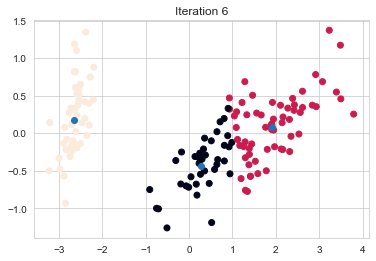

In [57]:
k = kmeans(test_df, 3)